# Data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

df = pd.read_csv('2019-airline-delays-and-cancellations/flights_table.csv')
df.shape

(1186213, 40)

In [3]:
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
0,9,30,1,11057,11292,1615.0,0.0,0.0,1600-1659,1737.0,0.0,1700-1759,1337.0,6,4.0,19977,United Air Lines Inc.,0.00,0.0,0.0,91.0,70.0,70.0,12.1,5.82,0.00,0.0,0.0,76.0,50.0,30.0,25.1,11.41,0,0.184016,0.138449,0.143890,0.138719,0.179688,0.156900
1,8,30,5,13495,10821,1321.0,6.0,0.0,1300-1359,1640.0,0.0,1600-1659,998.0,4,3.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,95.0,75.0,30.0,13.0,4.70,0.00,0.0,0.0,91.0,58.0,270.0,14.1,4.70,0,0.165741,0.163102,0.183021,0.213537,0.197496,0.179450
2,3,13,3,11057,11618,1309.0,84.0,1.0,1100-1159,1457.0,67.0,1400-1459,529.0,3,2.0,19805,American Airlines Inc.,0.00,0.0,0.0,66.0,34.0,170.0,14.1,5.59,0.00,0.0,0.0,47.0,28.0,130.0,14.1,5.14,1,0.199008,0.179731,0.265083,0.150104,0.165468,0.152607
3,12,13,5,11057,10257,2210.0,1.0,0.0,2200-2259,2350.0,0.0,2300-2359,646.0,3,2.0,19805,American Airlines Inc.,1.73,0.0,0.0,43.0,34.0,50.0,16.1,8.28,0.04,0.0,0.0,40.0,30.0,160.0,18.1,6.26,0,0.185509,0.182110,0.244121,0.183758,0.289847,0.304861
4,3,7,4,11057,10994,745.0,0.0,0.0,0700-0759,853.0,0.0,0800-0859,168.0,1,2.0,20417,Comair Inc.,0.00,0.0,0.0,54.0,28.0,120.0,13.0,5.37,0.00,0.0,0.0,63.0,31.0,170.0,15.0,3.80,0,0.173339,0.179731,0.170961,0.173585,0.086026,0.060502


In [4]:
len(df[df.ARR_DEL15 == 1]) / len(df)

0.18219156256085542

Text(0, 0.5, 'Freq')

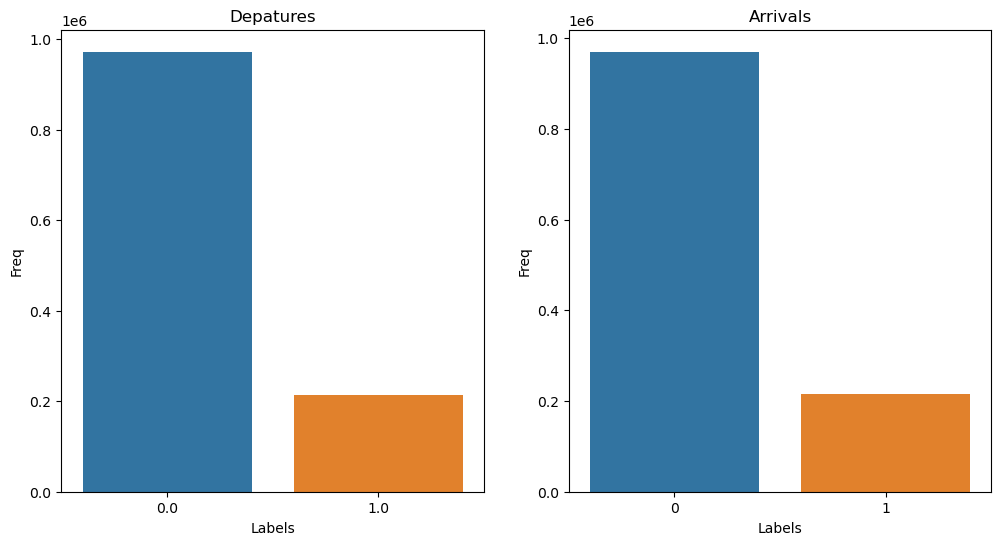

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(df['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(df['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

# Working with a balanced dataset

In [5]:
balanced = df.loc[df['ARR_DEL15'] == 1]
balanced.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
2,3,13,3,11057,11618,1309.0,84.0,1.0,1100-1159,1457.0,67.0,1400-1459,529.0,3,2.0,19805,American Airlines Inc.,0.00,0.0,0.0,66.0,34.0,170.0,14.1,5.59,0.00,0.0,0.0,47.0,28.0,130.0,14.1,5.14,1,0.189410,0.179731,0.265083,0.152191,0.165468,0.152607
13,7,30,2,12266,11618,2005.0,95.0,1.0,1800-1859,105.0,116.0,0001-0559,1400.0,6,5.0,19977,United Air Lines Inc.,0.00,0.0,0.0,91.0,80.0,60.0,25.1,13.65,0.00,0.0,0.0,95.0,75.0,100.0,21.0,8.72,1,0.233495,0.227018,0.304226,0.202498,0.332019,0.528310
15,8,5,1,12889,12892,1656.0,49.0,1.0,1600-1659,1802.0,33.0,1800-1859,236.0,1,3.0,19805,American Airlines Inc.,0.00,0.0,0.0,113.0,86.0,260.0,19.9,6.93,0.00,0.0,0.0,71.0,62.0,260.0,21.0,8.95,1,0.227793,0.196139,0.185519,0.180121,0.270536,0.245090
16,1,7,2,12892,14893,1216.0,194.0,1.0,0900-0959,1339.0,173.0,1300-1359,373.0,2,2.0,20304,SkyWest Airlines Inc.,0.21,0.0,0.0,60.0,51.0,60.0,17.0,7.83,0.00,0.0,0.0,57.0,47.0,180.0,19.9,8.50,1,0.148681,0.132809,0.109951,0.093747,0.103935,0.106000
22,3,9,6,12892,11638,2116.0,86.0,1.0,1900-1959,2212.0,69.0,2200-2259,209.0,1,6.0,20304,SkyWest Airlines Inc.,0.00,0.0,0.0,61.0,47.0,270.0,19.9,10.29,0.12,0.0,0.0,57.0,40.0,160.0,16.1,6.49,1,0.178138,0.205401,0.209514,0.190346,0.245836,0.259848


In [6]:
balanced.shape

(216118, 40)

In [7]:
balanced_no_delay = df.loc[df['ARR_DEL15'] == 0][:216118]
balanced_no_delay.shape

(216118, 40)

In [8]:
balanced = pd.concat([balanced, balanced_no_delay])

In [9]:
balanced = balanced.sort_index()
balanced.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
1186197,11,28,4,15370,12266,915.0,0.0,0.0,0900-0959,1121.0,27.0,1100-1159,429.0,2,1.0,20366,Atlantic Southeast Airlines,0.17,0.0,0.0,41.0,36.0,90.0,16.1,9.17,0.00,0.0,0.0,88.0,75.0,60.0,16.1,7.83,1,0.180221,0.105900,0.130479,0.141108,0.114738,0.104582
1186209,6,29,6,12191,12339,2243.0,168.0,1.0,1900-1959,151.0,161.0,0001-0559,861.0,4,5.0,19393,Southwest Airlines Co.,0.26,0.0,0.0,89.0,71.0,60.0,30.0,5.82,0.00,0.0,0.0,90.0,70.0,270.0,19.9,8.95,1,0.259999,0.341019,0.259370,0.233141,0.393186,0.573245
1186210,12,8,7,12478,12892,1434.0,0.0,0.0,1400-1459,1812.0,16.0,1800-1859,2475.0,10,1.0,20409,JetBlue Airways,0.00,0.0,0.0,44.0,28.0,160.0,18.1,7.16,0.05,0.0,0.0,65.0,58.0,270.0,23.0,8.72,1,0.303259,0.221606,0.237173,0.223586,0.236550,0.221787
1186211,3,13,3,15370,12266,750.0,50.0,1.0,0700-0759,1005.0,83.0,1000-1059,429.0,2,1.0,19977,United Air Lines Inc.,1.24,0.0,0.0,68.0,48.0,200.0,44.1,27.96,0.02,0.0,0.0,84.0,66.0,70.0,21.0,10.51,1,0.184517,0.111111,0.179126,0.152191,0.086026,0.111288
1186212,2,13,4,13577,10397,1144.0,14.0,0.0,1100-1159,1309.0,16.0,1300-1359,317.0,2,3.0,19790,Delta Air Lines Inc.,0.00,0.0,14.2,20.0,4.0,300.0,15.0,7.61,0.00,0.0,0.0,56.0,36.0,320.0,21.9,11.41,1,0.125538,0.189922,0.148550,0.238772,0.139820,0.121892


In [12]:
balanced = encode(balanced)
balanced.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DE

In [13]:
from sklearn.model_selection import train_test_split

y = balanced['ARR_DEL15']
X = balanced.drop(['ARR_DEL15', 'ARR_TIME_Nan'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_bal = RandomForestClassifier(max_depth=20, random_state=42)
forest_clf_bal.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [16]:
from sklearn.metrics import classification_report

y_pred = forest_clf_bal.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     53897
           1       0.94      0.80      0.86     54162

    accuracy                           0.87    108059
   macro avg       0.88      0.87      0.87    108059
weighted avg       0.88      0.87      0.87    108059



In [17]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[51027,  2870],
       [10704, 43458]], dtype=int64)

In [31]:
from sklearn.metrics import roc_auc_score

pred_prob = forest_clf_bal.predict_proba(X_test)
roc_auc_score(y_test, pred_prob[:,1])

0.9457677667955919

In [18]:
import rfpimp
rfpimp.importances(forest_clf_bal, X_test, y_test)

,Importance
Feature,
DEP_DELAY_NEW,0.1912
DEP_DEL15,0.0398
PRCP_ARR,0.0024
AWND_DEP,0.0020
TMIN_ARR,0.0018
...,...
ARR_AIRPORT_14107,-0.0002
ARR_AIRPORT_11618,-0.0002
ARR_AIRPORT_12953,-0.0002


In [22]:
(len(balanced.loc[(balanced.ARR_DEL15 == 1) & (balanced.DEP_DEL15 == 1)]) + len(balanced.loc[(balanced.ARR_DEL15 == 0) & (balanced.DEP_DEL15 == 0)])) / len(balanced)

0.8671026938987035

In [25]:
from sklearn.metrics import accuracy_score

acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

87.44

# Data preparation

In [5]:
import regex as re

def encode(df):
    dep_airport_ohe = pd.get_dummies(df['DEP_AIRPORT_ID'])
    arr_airport_ohe = pd.get_dummies(df['ARR_AIRPORT_ID'])
    dep_airport_ohe = dep_airport_ohe.rename(columns=lambda x: re.sub("^", "DEP_AIRPORT_", str(x)))
    arr_airport_ohe = arr_airport_ohe.rename(columns=lambda x: re.sub("^", "ARR_AIRPORT_", str(x)))
    df = df.drop(['MONTH','CARRIER_NAME', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID'], axis=1)
    df = pd.concat([df, dep_airport_ohe], axis=1)
    df = pd.concat([df, arr_airport_ohe], axis=1)
    
    dep_time_block = pd.get_dummies(df['DEP_TIME_BLK'])
    arr_time_block = pd.get_dummies(df['ARR_TIME_BLK'])
    dep_time_block = dep_time_block.rename(columns=lambda x: re.sub("^", "DEP_TIME_", str(x)))
    arr_time_block = arr_time_block.rename(columns=lambda x: re.sub("^", "ARR_TIME_", str(x)))
    df = pd.concat([df, dep_time_block], axis=1)
    df = pd.concat([df, arr_time_block], axis=1)
    df.drop(['DEP_AIRPORT_ID', 'ARR_AIRPORT_ID', 'DEP_TIME', 'DEP_TIME_BLK', 
             'ARR_TIME', 'ARR_TIME_BLK'], axis=1, inplace=True)
    
    return df


In [6]:
df = encode(df)
df.head()

,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY_NEW,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DEP_TIME_1500-1559,DEP_T

# Random Forest

In [7]:
from sklearn.model_selection import train_test_split

y = df['ARR_DEL15']
X = df.drop(['ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_Nan'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
from sklearn.metrics import *
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth=20, random_state=42)
forest_clf.fit(X_train, y_train)

Wall time: 7min 41s


RandomForestClassifier(max_depth=20, random_state=42)

In [10]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

93.44

In [18]:
(len(df.loc[(df.ARR_DEL15 == 1) & (df.DEP_DEL15 == 1)]) + len(df.loc[(df.ARR_DEL15 == 0) & (df.DEP_DEL15 == 0)])) / len(df)

0.9217594142030141

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.89      0.73      0.80     53898

    accuracy                           0.93    296554
   macro avg       0.92      0.85      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [20]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[238027,   4629],
       [ 14810,  39088]], dtype=int64)

In [21]:
from sklearn.metrics import roc_auc_score

pred_prob2 = forest_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9463914481016196

In [69]:
y_pred = forest_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8532551303877349

In [23]:
import rfpimp
rfpimp.importances(forest_clf, X_test, y_test).head(10)

,Importance
Feature,
DEP_DELAY_NEW,0.1168
DEP_DEL15,0.0272
SEGMENT_NUMBER,0.0012
DAY_HISTORICAL,0.0012
WSF2_DEP,0.0010
TMIN_DEP,0.0006
ARR_BLOCK_HIST,0.0006
WDF2_DEP,0.0006
DISTANCE_GROUP,0.0006


In [11]:
import rfpimp
rfpimp.importances(forest_clf, X_test, y_test).head(10)

,Importance
Feature,
DEP_DELAY_NEW,0.1402
DEP_DEL15,0.0238
ARR_AIRPORT_HIST,0.0016
PRCP_ARR,0.0016
ARR_BLOCK_HIST,0.0012
WSF2_DEP,0.0012
WSF2_ARR,0.0012
PRCP_DEP,0.0010
AWND_DEP,0.0010


In [17]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
scores = cross_val_score(forest_clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93436266 0.93482632 0.93409711 0.93424436 0.93458157]
Average CV Score:  0.9344224013571946
Number of CV Scores used in Average:  5


# SGDClassifier

In [47]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd_clf.fit(X_train, y_train)

Wall time: 1min 14s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [48]:
from sklearn.metrics import accuracy_score

y_pred = sgd_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

92.57

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    242656
           1       0.83      0.75      0.79     53898

    accuracy                           0.93    296554
   macro avg       0.89      0.86      0.87    296554
weighted avg       0.93      0.93      0.93    296554



In [19]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[234617,   8039],
       [ 13358,  40540]], dtype=int64)

In [49]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8639899850672068

In [52]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(loss="modified_huber" ,max_iter=1000, tol=1e-3))
sgd_clf.fit(X_train, y_train)

Wall time: 1min 33s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='modified_huber'))])

In [53]:
y_pred = sgd_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

93.14

In [54]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[237119,   5537],
       [ 14796,  39102]], dtype=int64)

In [55]:
balanced_accuracy_score(y_test, y_pred)

0.8513315771472244

In [56]:
pred_prob = sgd_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob[:,1])

0.9214404613459821

In [29]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score

k_folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=33)
scores = cross_val_score(sgd_clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.92927764 0.92634706 0.92745985 0.92817136]
Average CV Score:  0.9278139748395432
Number of CV Scores used in Average:  4
Wall time: 4min 38s


# Logistic Regression

In [23]:
%%time
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
log_reg_clf.fit(X_train, y_train)

Wall time: 8min 40s


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

log_reg_clf_scale = make_pipeline(StandardScaler(), LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000))
log_reg_clf_scale.fit(X_train, y_train)

Wall time: 1min 30s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [24]:
log_reg_clf.score(X_test, y_test)

0.9327576090695118

In [22]:
log_reg_clf_scale.score(X_test, y_test)

0.9338366705557841

In [27]:
pred_prob2 = log_reg_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9267401297858635

In [29]:
pred_prob3 = log_reg_clf_scale.predict_proba(X_test)
roc_auc_score(y_test, pred_prob3[:,1])

0.9371505812960343

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.89      0.71      0.79     53898

    accuracy                           0.93    296554
   macro avg       0.92      0.85      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [31]:
confusion_matrix(y_test, y_pred)

array([[238126,   4530],
       [ 15425,  38473]], dtype=int64)

In [19]:
confusion_matrix(y_test, y_pred_scale)

array([[238467,   4189],
       [ 15432,  38466]], dtype=int64)

In [61]:
y_pred = log_reg_clf_scale.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8482091383703527

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_pred, y_test)

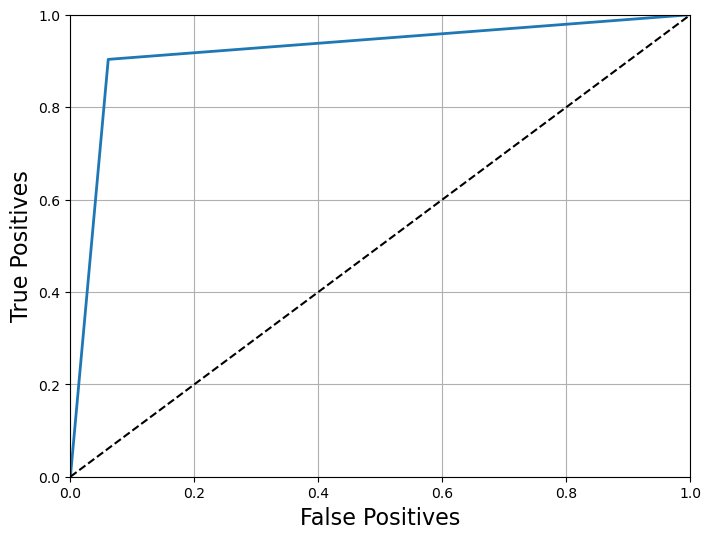

In [45]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positives', fontsize=16)
    plt.ylabel('True Positives', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [67]:
forest_clf = pickle.load(open('forest_clf_pkl', 'rb'))
forest_clf.score(X_test, y_test)

0.9344537588432461

## XGB Classification

In [17]:
%%time
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eta=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1)
xgb_clf.fit(X_train, y_train)

Wall time: 10min 12s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [23]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_grid = { 
    'n_estimators': [200, 400],
    'max_depth': [6],
    'eta': [0.05, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 2],
    'random_state': [42]
}

xgb_clf = GridSearchCV(estimator=XGBClassifier(), param_grid = xgb_grid, cv=3)
xgb_clf.fit(X_train[:100000], y_train[:100000])

Wall time: 44min 7s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [34]:
xgb_clf = XGBClassifier(eta=0.05, max_depth=6, n_estimators=400, scale_pos_weight=1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [93]:
xgb_clf2 = XGBClassifier(eta=0.05, max_depth=6, n_estimators=200, scale_pos_weight=4)
xgb_clf2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [36]:
xgb_clf.score(X_test, y_test)

0.9360150259311963

In [94]:
xgb_clf2.score(X_test, y_test)

0.9175124935087707

In [ ]:
from sklearn.metrics import roc_auc_score

pred_prob2 = xgb_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

In [11]:
import pickle

xgb_clf2 = pickle.load(open('xgb_clf2_pkl', 'rb'))
pred_prob2 = xgb_clf2.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9450946604698863

In [13]:
y_pred = xgb_clf2.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8775987663099543

In [14]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[228171,  14485],
       [  9977,  43921]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    242656
           1       0.84      0.77      0.80     53898

    accuracy                           0.93    296554
   macro avg       0.90      0.87      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [14]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[234932,   7724],
       [ 12425,  41473]], dtype=int64)

In [71]:
from sklearn.metrics import roc_auc_score

pred_prob2 = xgb_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9505419876582513

In [72]:
y_pred = xgb_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8522679840684462

In [22]:
X_test.shape

(296554, 257)

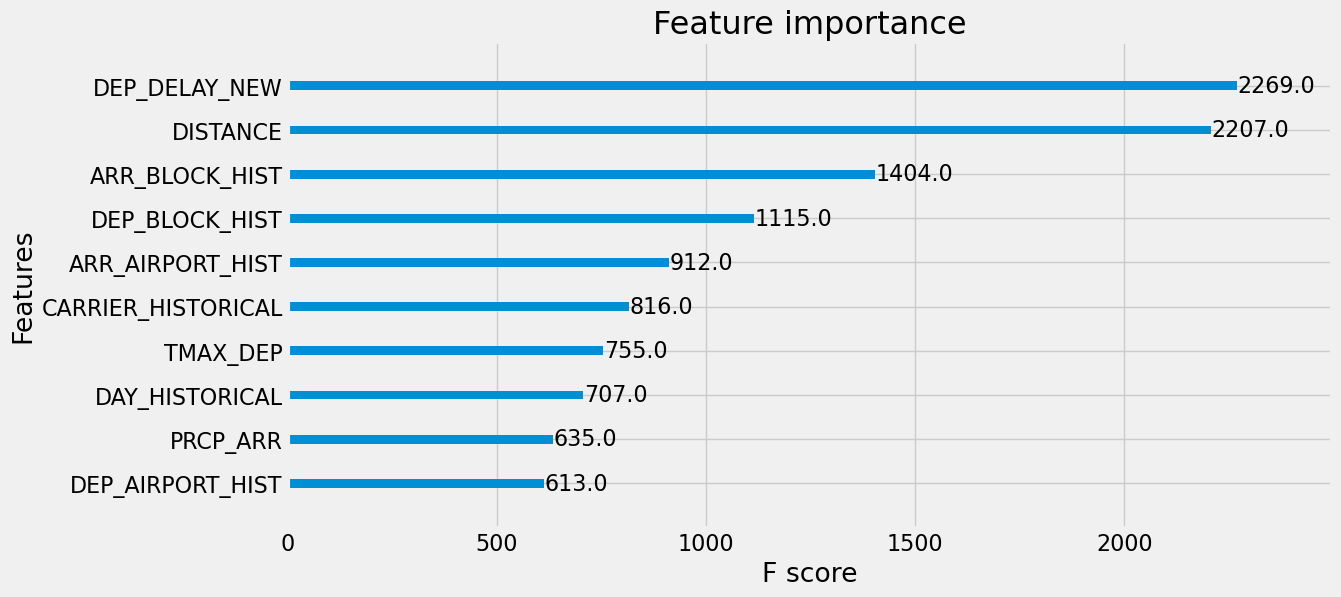

In [44]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_clf, max_num_features=10, ax=ax)
plt.show()

# Linear Forest Classification

In [20]:
%%time
from sklearn.linear_model import LinearRegression
from lineartree import LinearForestClassifier

lin_for_clf = LinearForestClassifier(base_estimator=LinearRegression())
lin_for_clf.fit(X_train[:200000], y_train[:200000])

Wall time: 30min 16s


LinearForestClassifier(base_estimator=LinearRegression())

In [21]:
from sklearn.metrics import accuracy_score

y_pred = lin_for_clf.predict(X_test)
acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_xgb

93.38

In [23]:
y_pred = lin_for_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.846711279538024

In [22]:
pred_prob2 = lin_for_clf.predict_proba(X_test)
roc_auc_score(y_test, pred_prob2[:,1])

0.9387812273758394

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    242656
           1       0.90      0.71      0.80     53898

    accuracy                           0.93    296554
   macro avg       0.92      0.85      0.88    296554
weighted avg       0.93      0.93      0.93    296554



In [47]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[238549,   4107],
       [ 15503,  38395]], dtype=int64)

# Linear Boost Classification

In [73]:
%%time
from lineartree import LinearBoostClassifier
from sklearn.linear_model import RidgeClassifier

lin_boost_clf = LinearBoostClassifier(base_estimator=RidgeClassifier())
lin_boost_clf.fit(X_train, y_train)

Wall time: 5min 49s


LinearBoostClassifier(base_estimator=RidgeClassifier())

In [74]:
lin_boost_clf.score(X_test, y_test)

0.9334320224984319

In [75]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[238735,   3921],
       [ 15054,  38844]], dtype=int64)

In [87]:
from sklearn.metrics import roc_auc_score

pred_prob2 = lin_boost_clf.predict_proba(X_test)
roc_auc_score(pred_prob2[:,1], y_test)

0.9208285579417679

In [86]:
y_pred = lin_boost_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8464608943515478

In [13]:
%%time
from lineartree import LinearBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import *

lin_boost_clf2 = LinearBoostClassifier(base_estimator=LogisticRegression())
lin_boost_clf2.fit(X_train[:300000], y_train[:300000])

Wall time: 4min 41s


LinearBoostClassifier(base_estimator=LogisticRegression())

In [14]:
lin_boost_clf2.score(X_test, y_test)

0.9318066861347343

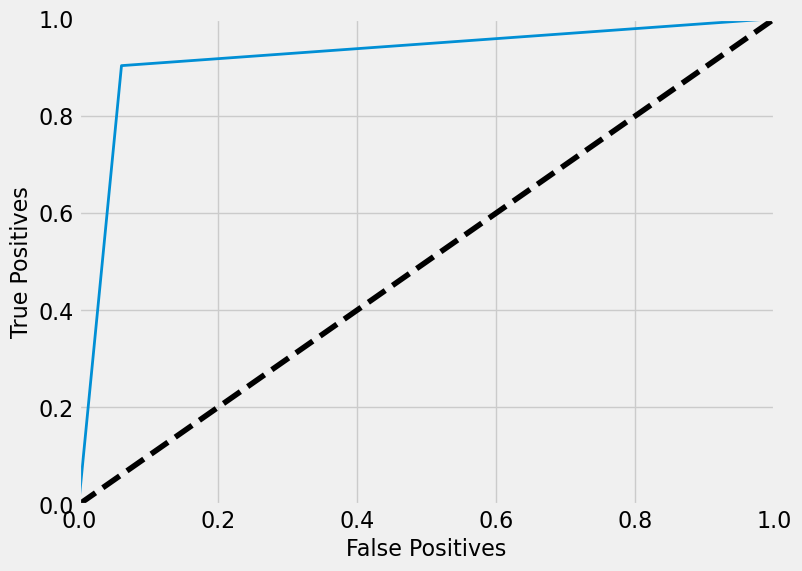

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positives', fontsize=16)
    plt.ylabel('True Positives', fontsize=16)
    plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_pred, y_test)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [20]:
import pickle

with open('forest_clf_pkl', 'wb') as files:
    pickle.dump(forest_clf, files)
    
with open('sgd_clf_pkl', 'wb') as files:
    pickle.dump(sgd_clf, files)
    
with open('log_reg_clf_pkl', 'wb') as files:
    pickle.dump(log_reg_clf_scale, files)
    


In [23]:
import pickle

with open('xgb_clf_pkl', 'wb') as files:
    pickle.dump(xgb_clf, files)
    
with open('lin_boost_clf_pkl', 'wb') as files:
    pickle.dump(lin_boost_clf, files)
    
with open('forest_reg_pkl', 'wb') as files:
    pickle.dump(forest_reg, files)

# 

# Random Forest Regressor

In [16]:
X_reg = df.loc[df.ARR_DELAY_NEW >= 15].drop(columns=['ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_TIME_Nan'])
y_reg = df.loc[df.ARR_DELAY_NEW >= 15]['ARR_DELAY_NEW']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

In [25]:
%%time
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)
forest_reg.fit(X_train_reg, y_train_reg)

Wall time: 3min 36s


RandomForestRegressor(n_estimators=20, random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error

y_pred_forest_reg = forest_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_forest_reg)
rmse = mse**.5

print(mse)
print(rmse)

274.48653540714133
16.56763517847799


In [27]:
from sklearn.metrics import mean_squared_error

y_pred_forest_reg = forest_reg.predict(X_train_reg)
mse = mean_squared_error(y_train_reg, y_pred_forest_reg)
rmse = mse**.5

print(mse)
print(rmse)

42.67870685930017
6.532894217672606


In [58]:
import rfpimp
rfpimp.importances(forest_reg, X_test_reg, y_test_reg).head(10)

,Importance
Feature,
DEP_DELAY_NEW,1.925940
PRCP_ARR,0.015546
ARR_AIRPORT_HIST,0.011915
PRCP_DEP,0.011617
ARR_BLOCK_HIST,0.011205
DEP_BLOCK_HIST,0.005888
DISTANCE,0.005501
WSF2_ARR,0.004471
TMAX_DEP,0.003439


In [17]:
%%time
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_depth=200, n_estimators=100,
                      random_state=42)
forest_reg.fit(X_train_reg, y_train_reg)

Wall time: 20min 45s


RandomForestRegressor(max_depth=200, random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error

y_pred_forest_reg = forest_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_forest_reg)
rmse = mse**.5

print(mse)
print(rmse)

265.02937194116976
16.279722723104648


In [19]:
from sklearn.metrics import mean_squared_error

y_pred_forest_reg = forest_reg.predict(X_train_reg)
mse = mean_squared_error(y_train_reg, y_pred_forest_reg)
rmse = mse**.5

print(mse)
print(rmse)

36.28019832355813
6.023304601591898


In [26]:
from sklearn.model_selection import GridSearchCV

forest_grid = { 
    'n_estimators': [10, 20, 50],
    'max_features': ['sqrt','log2'],
    'max_depth' : [5, 10, 20],
    'random_state' : [42]
}

forest_reg_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid = forest_grid, cv=5)
forest_reg_cv.fit(X_train_reg, y_train_reg)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50], 'random_state': [42]})

In [27]:
from sklearn.metrics import mean_squared_error

y_pred_reg_cv = forest_reg_cv.predict(X_test_reg)
mse_cv = mean_squared_error(y_test_reg, y_pred_reg_cv)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

1646.5865255464819
40.57815330379738


In [28]:
forest_reg_cv.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=50,
                      random_state=42)

# XGBoost Regression 

In [29]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=200)
xgb_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred_reg = xgb_reg.predict(X_test_reg)
mse_cv = mean_squared_error(y_test_reg, y_pred_reg)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

244.83410815480795
15.647175724545562


In [30]:
y_pred_reg = xgb_reg.predict(X_test_reg)
mse_cv = mean_squared_error(y_test_reg, y_pred_reg)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

226.64568805574476
15.054756326681105


In [17]:
import pickle
xgb_reg = pickle.load(open("xgb_reg_pkl", 'rb'))
y_pred_reg = xgb_reg.predict(X_train_reg)
mse_cv = mean_squared_error(y_train_reg, y_pred_reg)
rmse_cv = mse_cv**.5

print(mse_cv)
print(rmse_cv)

157.99106208658824
12.569449553842373


In [60]:
pred_df = pd.DataFrame(y_pred_reg)
pred_df = pd.concat([pred_df, y_test_reg.reset_index()], axis=1)
pred_df.drop(columns=['index'], inplace=True)
pred_df = pd.concat([pred_df, X_test_reg['DEP_DELAY_NEW'].reset_index()], axis=1)
pred_df.reset_index()
pred_df.rename(columns={0: 'xgboost', 'ARR_DELAY_NEW': 'y_test', 'DEP_DELAY_NEW': 'dep_delay'}, inplace=True)

In [61]:
pred_forest_reg_df = pd.DataFrame(y_pred_forest_reg)
pred_df = pd.concat([pred_df, pred_forest_reg_df], axis=1)
pred_df.rename(columns={0: 'forest'}, inplace=True)
pred_df['forest'], pred_df['index'] = pred_df['index'], pred_df['forest']
pred_df.rename(columns={'index': 'forest', 'forest': 'index'}, inplace=True)
pred_df.head(10)

,xgboost,y_test,forest,dep_delay,index
0,55.746223,58.0,52.50,49.0,976813
1,31.697531,15.0,20.20,0.0,626576
2,24.442030,21.0,23.75,3.0,39178
3,20.457840,48.0,40.75,0.0,391107
4,29.899532,32.0,32.25,4.0,862697
5,34.651192,41.0,42.15,46.0,707377
6,254.226273,268.0,264.60,260.0,1181769
7,25.305323,24.0,24.55,0.0,1093154
8,33.843525,26.0,27.80,0.0,463833
9,46.737076,77.0,67.95,46.0,1150908


In [77]:
pred_df.tail(25)

,xgboost,y_test,forest,dep_delay,index
54005,170.438232,145.0,149.05,171.0,190746
54006,219.605911,246.0,237.90,226.0,1098260
54007,31.292023,23.0,26.15,4.0,993289
54008,33.702244,15.0,19.40,20.0,651923
54009,29.392628,45.0,42.85,33.0,79682
54010,125.436241,99.0,105.25,115.0,730517
54011,24.790667,18.0,19.85,16.0,1044767
54012,400.338593,402.0,403.95,404.0,1016310
54013,31.795355,15.0,17.15,0.0,36278
54014,53.840393,45.0,50.80,56.0,44064


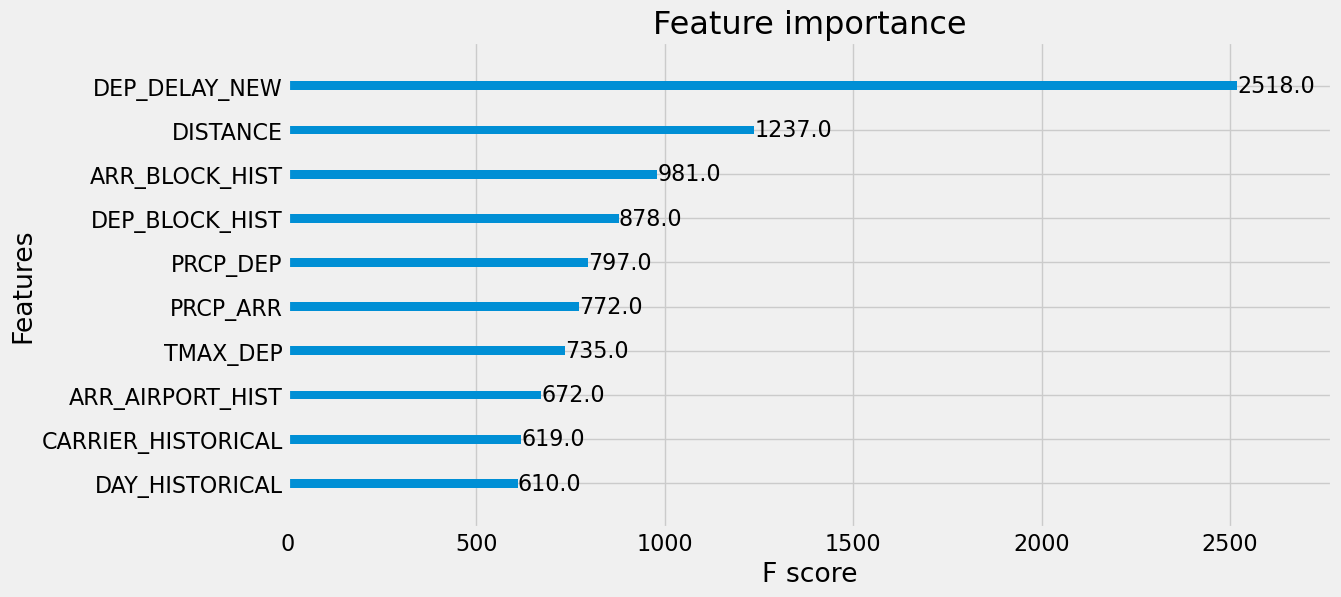

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_reg, max_num_features=10, ax=ax)
plt.show();